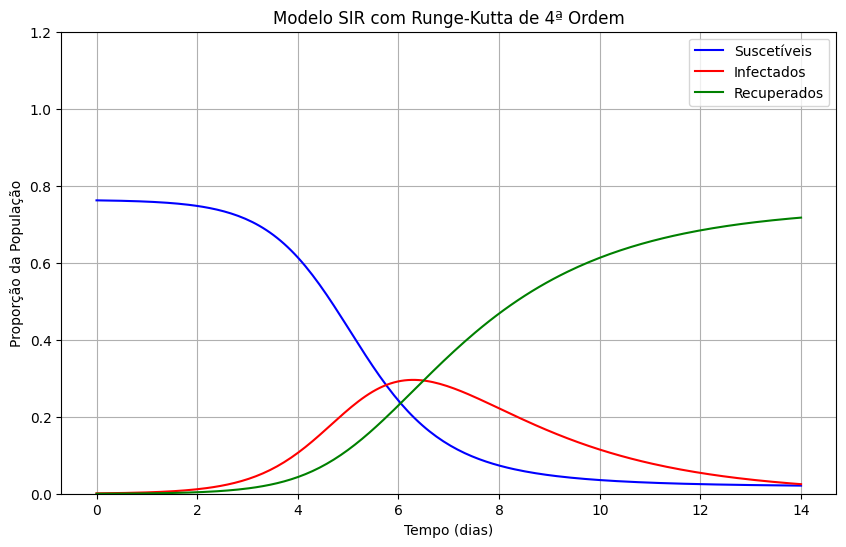

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do modelo
N = 763  # População total
I0, R0 = 1, 0  # Infectados e recuperados iniciais
S0 = N - I0 - R0  # Suscetíveis iniciais
beta, gamma = 1.68, 0.44  # Taxa de contato e taxa de recuperação

# Intervalo de tempo
t = np.linspace(0, 14, 200)
dt = t[1] - t[0]  # passo de tempo
n = len(t)

# Inicialização dos vetores
S = np.zeros(n)
I = np.zeros(n)
R = np.zeros(n)

# Condições iniciais
S[0] = S0
I[0] = I0
R[0] = R0

# Função derivadas do modelo SIR
def deriv(s, i, r, beta, gamma, N):
    dSdt = -beta * s * i / N  #diminui proporcional ao número de encontros suscetível-infectado
    dIdt = beta * s * i / N - gamma * i # cresce com novas infecções e decresce com recuperações.
    dRdt = gamma * i #aumenta proporcional ao número de infectados.
    return dSdt, dIdt, dRdt

# Método de Runge-Kutta 4ª ordem
for k in range(n - 1):
    k1_S, k1_I, k1_R = deriv(S[k], I[k], R[k], beta, gamma, N)
    k2_S, k2_I, k2_R = deriv(S[k] + dt*k1_S/2, I[k] + dt*k1_I/2, R[k] + dt*k1_R/2, beta, gamma, N)
    k3_S, k3_I, k3_R = deriv(S[k] + dt*k2_S/2, I[k] + dt*k2_I/2, R[k] + dt*k2_R/2, beta, gamma, N)
    k4_S, k4_I, k4_R = deriv(S[k] + dt*k3_S, I[k] + dt*k3_I, R[k] + dt*k3_R, beta, gamma, N)

    S[k+1] = S[k] + (dt/6)*(k1_S + 2*k2_S + 2*k3_S + k4_S)
    I[k+1] = I[k] + (dt/6)*(k1_I + 2*k2_I + 2*k3_I + k4_I)
    R[k+1] = R[k] + (dt/6)*(k1_R + 2*k2_R + 2*k3_R + k4_R)

# Plotagem dos resultados
plt.figure(figsize=(10,6))
plt.plot(t, S/1000, 'b', label='Suscetíveis')
plt.plot(t, I/1000, 'r', label='Infectados')
plt.plot(t, R/1000, 'g', label='Recuperados')
plt.title('Modelo SIR com Runge-Kutta de 4ª Ordem')
plt.xlabel('Tempo (dias)')
plt.ylabel('Proporção da População')
plt.ylim(0, 1.2)
plt.grid(True)
plt.legend()
plt.show()
